Visualisation of class spread in dataset

In [1]:
import pandas
import utils
x, y = utils.read_datasets()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

histograms = {}

for index in range(1,7):
    histograms.update({x.iloc[:,index].name : np.histogram(x.iloc[:,index], bins=2)[0]})

In [3]:
histograms

{'toxic': array([4277, 2855]),
 'severe_toxic': array([5537, 1595]),
 'obscene': array([4241, 2891]),
 'threat': array([6654,  478]),
 'insult': array([4270, 2862]),
 'identity_hate': array([5727, 1405])}

In [4]:
non_toxic = x[(x.toxic == 0) & (x.severe_toxic == 0) & (x.threat == 0) & (x.identity_hate == 0) & (x.obscene == 0) & (x.insult == 0)]
print(non_toxic)

                                             comment_text  toxic  \
155838  "\nJust had a thought! I may be able to recrui...      0   
155841  is there any way to note on this page that a t...      0   
155842  . I am also well aware of your pally status wi...      0   
155843  "\nBecause anons have as much right to be hear...      0   
155844  "\n\n Please do not vandalize pages, as you di...      0   
...                                                   ...    ...   
159566  ":::::And for the second time of asking, when ...      0   
159567  You should be ashamed of yourself \n\nThat is ...      0   
159568  Spitzer \n\nUmm, theres no actual article for ...      0   
159569  And it looks like it was actually you who put ...      0   
159570  "\nAnd ... I really don't think you understand...      0   

        severe_toxic  obscene  threat  insult  identity_hate  
155838             0        0       0       0              0  
155841             0        0       0       0            

In [5]:
toxic = x[(x.toxic == 1) | (x.severe_toxic == 1) | (x.threat == 1) | (x.identity_hate == 1) | (x.obscene == 1) | (x.insult == 1)]
print(toxic)

                                             comment_text  toxic  \
6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
42      You are gay or antisemmitian? \n\nArchangel WH...      1   
55      Stupid peace of shit stop deleting my stuff as...      1   
79      Hi! I am back again!\nLast warning!\nStop undo...      1   
105            A pair of jew-hating weiner nazi schmucks.      1   
...                                                   ...    ...   
159312  Walter Mercado \n\nAntonio, quite frankly, you...      1   
159336  Oh, fuck off. The pansy Jew would just whine a...      1   
159400  Shalom \n\nSemite, get the fuck out of here. I...      1   
159449                         I think he is a gay fag!!!      1   
159494  "\n\n our previous conversation \n\nyou fuckin...      1   

        severe_toxic  obscene  threat  insult  identity_hate  
6                  1        1       0       1              0  
42                 0        1       0       1            

In [23]:
# Get comments only for specific label
toxic_comments = x[(x.toxic == 1)]
severe_toxic_comments = x[(x.severe_toxic == 1)]
threat_comments = x[(x.threat == 1)]
identity_hate_comments = x[(x.identity_hate == 1)]
obscene_comments= x[(x.obscene == 1)]
insult_comments = x[(x.insult == 1)]

In [7]:
df = pandas.DataFrame(data=histograms)
df = df.T
df
labels = ['toxic', 'severe toxic', 'obscene', 'threat', 'insult', 'identity hate']

In [8]:
df.columns = ['Not', 'Is']
df['labels'] = labels
df

,Not,Is,labels
toxic,4277,2855,toxic
severe_toxic,5537,1595,severe toxic
obscene,4241,2891,obscene
threat,6654,478,threat
insult,4270,2862,insult
identity_hate,5727,1405,identity hate


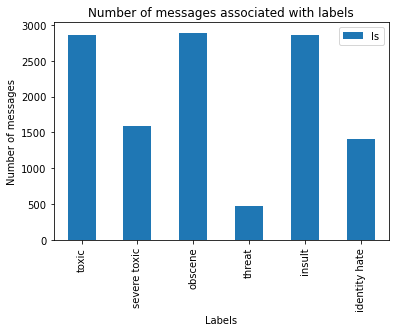

In [9]:
# Visualisation of label spread
df.plot(x ='labels', y='Is', kind = 'bar')

plt.title('Number of messages associated with labels')
plt.ylabel('Number of messages')
plt.xlabel('Labels')

plt.show()

In [10]:
# Finds average word length for each label
def calculate_average_word_length(doc):
    # Construct a list that contains the word lengths for each DISTINCT word in the document
    vocab_lengths = [len(i) for i in set(doc)] # TODO 4
    # Find the average word type length
    avg_vocab_length = sum(vocab_lengths) / len(vocab_lengths) # TODO 5

    return avg_vocab_length

In [11]:
toxic_avg = calculate_average_word_length(toxic_comments['comment_text'])
severe_toxic_avg = calculate_average_word_length(severe_toxic_comments['comment_text'])
threat_avg = calculate_average_word_length(threat_comments['comment_text'])
identity_hate_avg= calculate_average_word_length(identity_hate_comments['comment_text'])
obscene_avg= calculate_average_word_length(obscene_comments['comment_text'])
insult_avg = calculate_average_word_length(insult_comments['comment_text'])


df['average word-length'] = [toxic_avg, severe_toxic_avg, obscene_avg, threat_avg, insult_avg, identity_hate_avg]

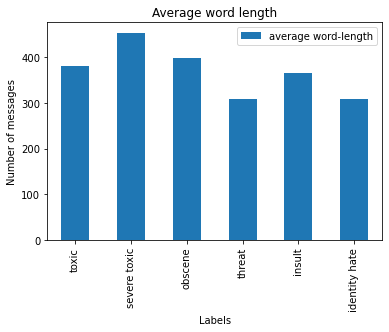

In [12]:
# Visualise average word length
df.plot(x ='labels', y='average word-length', kind = 'bar')

plt.title('Average word length')
plt.ylabel('Number of messages')
plt.xlabel('Labels')

plt.show()

In [13]:
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

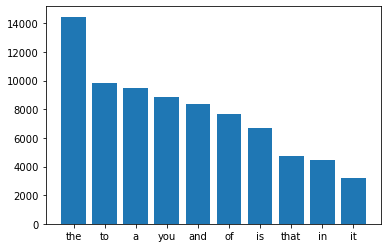

In [14]:
plot_top_stopwords_barchart(x['comment_text'])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

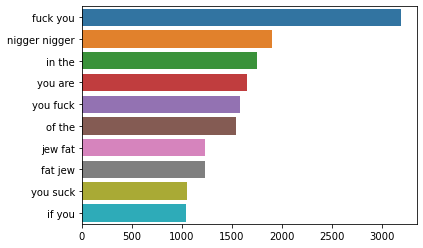

In [16]:
plot_top_ngrams_barchart(x['comment_text'], 2)

In [17]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

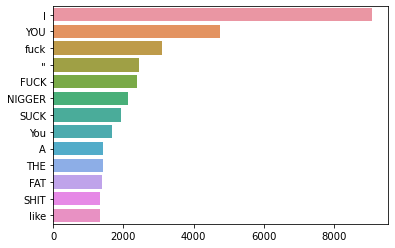

In [18]:
plot_top_non_stopwords_barchart(x['comment_text'])    

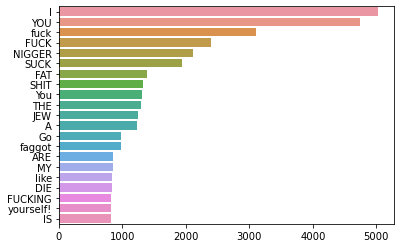

In [19]:
plot_top_non_stopwords_barchart(toxic['comment_text'])    

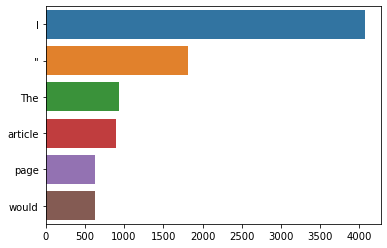

In [24]:
plot_top_non_stopwords_barchart(non_toxic['comment_text'])    

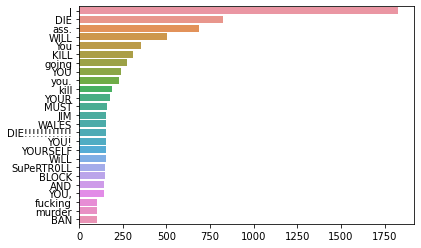

In [25]:
plot_top_non_stopwords_barchart(threat_comments['comment_text'])    

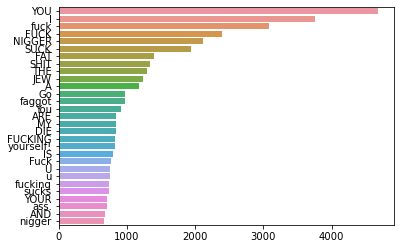

In [26]:
plot_top_non_stopwords_barchart(toxic_comments['comment_text'])    

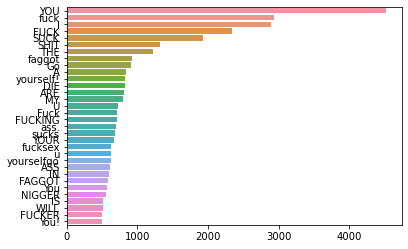

In [27]:
plot_top_non_stopwords_barchart(severe_toxic_comments['comment_text'])    

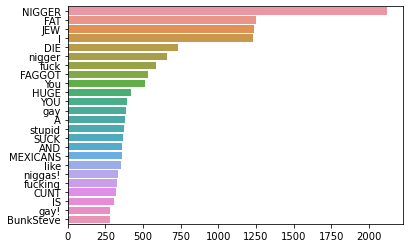

In [28]:
plot_top_non_stopwords_barchart(identity_hate_comments['comment_text'])    

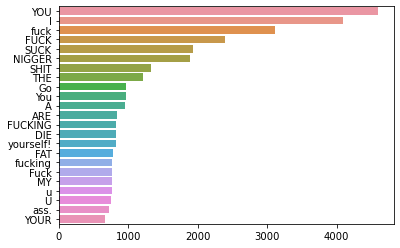

In [29]:
plot_top_non_stopwords_barchart(obscene_comments['comment_text'])    

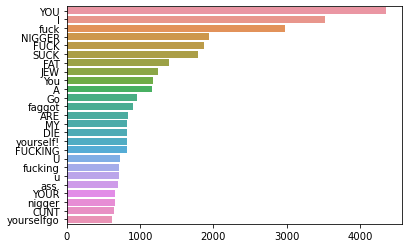

In [30]:
plot_top_non_stopwords_barchart(insult_comments['comment_text'])    

In [ ]:
# Heatmap


In [ ]:
# Word cloud
